In our project, we're using two data mining key tasks to help us predict the possibility of having cardiovascular diseases: Which are

1. Classification:

Goal: Predict whether a patient has cardiovascular diseases based on medical exams.
Features: Utilizing parameters like diastolic/systolic blood pressure, height, weight.
Method: Training a classification model on the 'cardio' class for disease presence/absence.

2. Clustering:

Objective: Group patients with similar health characteristics into clusters.
Application: Using clusters to predict new patients' cardiovascular health based on established patterns.
Benefits: Enhances understanding of patient subgroups and facilitates predictions for new patients.
By combining classification for individual predictions and clustering for broader insights, our approach aims to provide a comprehensive and accurate cardiovascular disease assessment.

"""
Dataset Information:
----------------
-Class Label: cardio
- Number of Rows: 500
- Number of Columns: 13
Dataset Source:
----------------
The dataset used in this analysis is sourced from Kaggle. It is available at the following Kaggle dataset page:
[ https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset ]

Columns:
----------------
- id: numerical value, Patient ID
- age:numerical value, Age of the patient
- gender: Binary value, Gender of the patient (1: female, 2: male)
- height: numerical value, Height of the patient (in cm)
- weight: numerical value, Weight of the patient (in kg)
- ap_hi:  numerical value, Systolic blood pressure
- ap_lo:  numerical value, Diastolic blood pressure
- cholesterol: ordinal value, Cholesterol level (1: normal, 2: above normal, 3: well above normal)
- gluc: ordinal value, Glucose level (1: normal, 2: above normal, 3: well above normal)
- smoke:  Binary value(asymmetric), Smoking status (0: non-smoker, 1: smoker)
- alco:   Binary value(asymmetric), Alcohol consumption status (0: non-drinker, 1: drinker)
- active: Binary value(asymmetric), Physical activity level (0: inactive, 1: active)
- cardio:  Binary value(asymmetric), Presence of cardiovascular disease (0: no, 1: yes)
"""

In [4]:
#Importing the dataset:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('cardio_train.csv')

In [5]:
#sample of the dataset:

print(df.head())


   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [6]:
#Missing values:
missing_values = df.isna().sum()
print("Missing values")
print(missing_values)


Missing values
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [7]:
# Statistical Summaries:
mean_age = df["age"].mean()
print(f"The mean for age is: {mean_age}")

median_age = df["age"].median()
print(f"The median for age is: {median_age}")

min_age = df ["age"].min()
print(f"The min for age is: {min_age}")

max_age = df["age"].max()
print(f"The max for age is: {max_age}")

var_age = df["age"].var()
print(f"The variance for age is: {var_age}")

df.quantile(q=[0.25, 0.5, 0.75], axis=0, numeric_only=True)

mean_height = df["height"].mean()
print(f"The mean for height is: {mean_height}")

median_height = df["height"].median()
print(f"The median for height is: {median_height}")

min_height = df ["height"].min()
print(f"The min for height is: {min_height}")

max_height = df["height"].max()
print(f"The max for height is: {max_height}")

var_height = df["height"].var()
print(f"The variance for height is: {var_height}")


mean_weight = df["weight"].mean()
print(f"The mean for weight is: {mean_weight}")

median_weight = df["weight"].median()
print(f"The median for weight is: {median_weight}")

min_weight = df ["weight"].min()
print(f"The min for weight is: {min_weight}")

max_weight = df["weight"].max()
print(f"The max for weight is: {max_weight}")

var_weight = df["weight"].var()
print(f"The variance for weight is: {var_weight}")

df.describe()



The mean for age is: 19546.645290581164
The median for age is: 19715.0
The min for age is: 14321
The max for age is: 23661
The variance for age is: 5889886.377944644
The mean for height is: 164.04008016032063
The median for height is: 164.0
The min for height is: 76
The max for height is: 188
The variance for height is: 84.6409606361317
The mean for weight is: 74.44549098196393
The median for weight is: 72.0
The min for weight is: 41.0
The max for weight is: 200.0
The variance for weight is: 264.4575448889747


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,348.450902,19546.645291,1.358717,164.040080,74.445491,128.146293,92.310621,1.390782,1.228457,0.094188,0.042084,0.785571,0.525050
std,207.505550,2426.908811,0.480105,9.200052,16.262151,17.419944,100.029382,0.692469,0.573785,0.292384,0.200983,0.410837,0.499873
min,0.000000,14321.000000,1.000000,76.000000,41.000000,80.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,169.500000,18044.000000,1.000000,158.000000,64.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,343.000000,19715.000000,1.000000,164.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,526.500000,21703.000000,2.000000,170.000000,84.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,714.000000,23661.000000,2.000000,188.000000,200.000000,190.000000,1100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


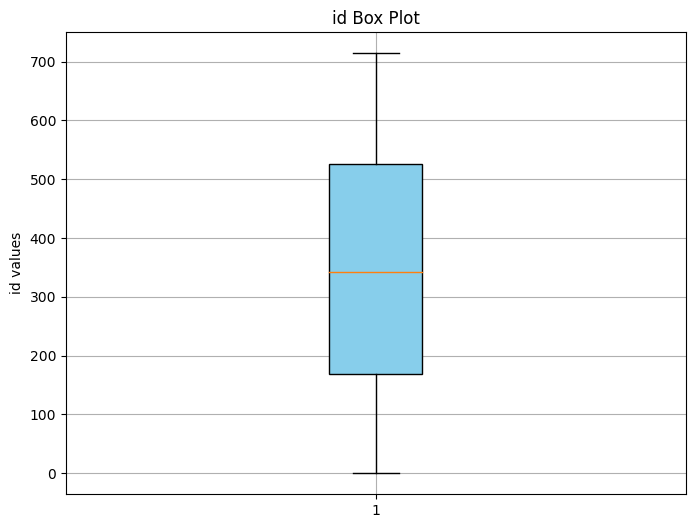

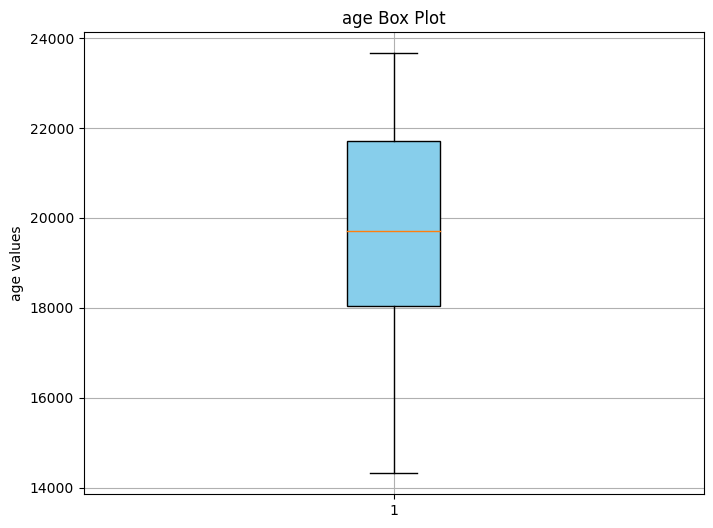

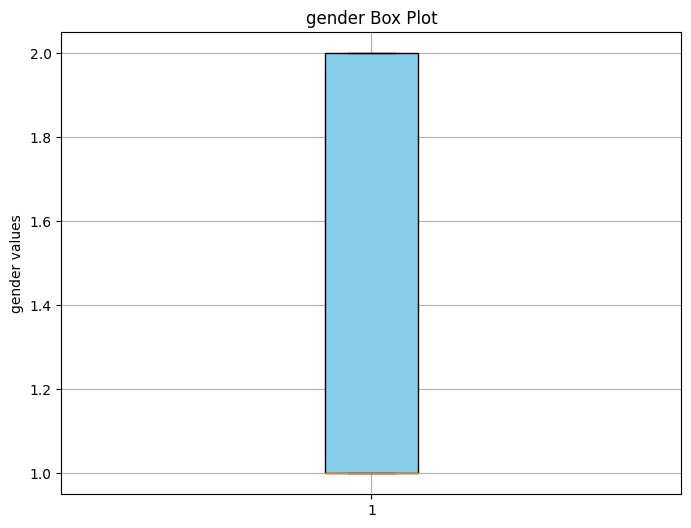

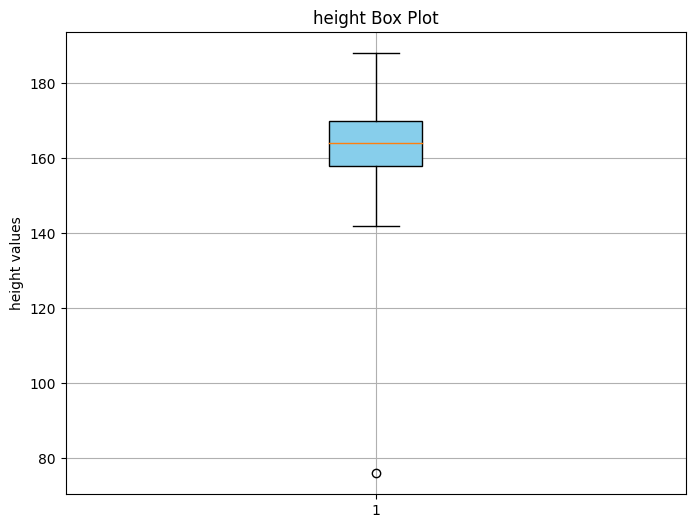

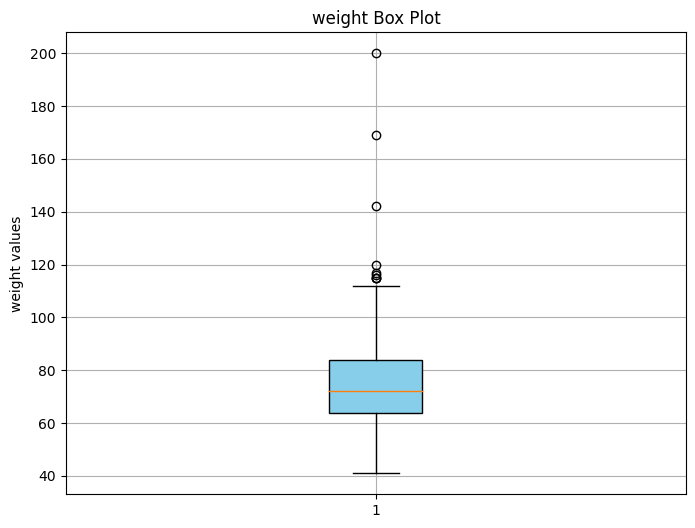

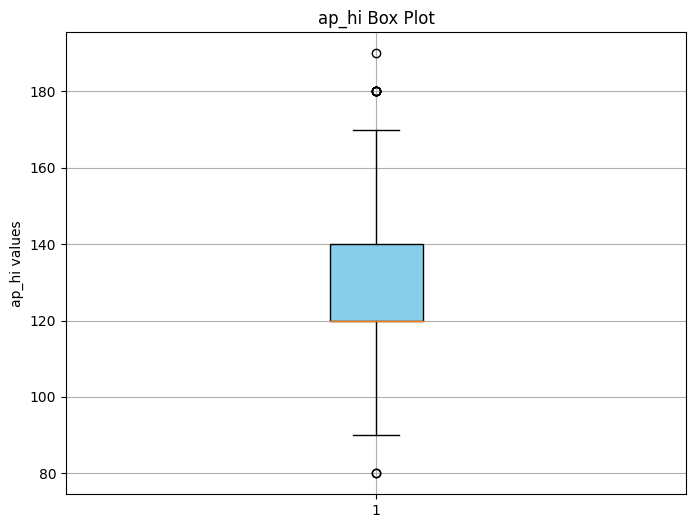

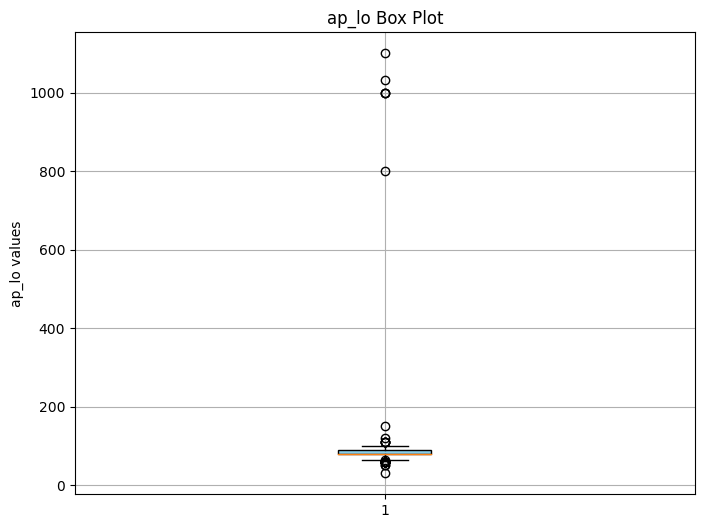

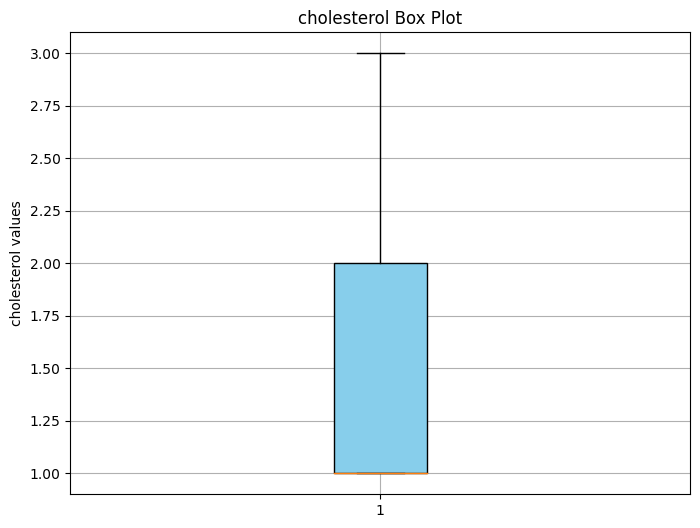

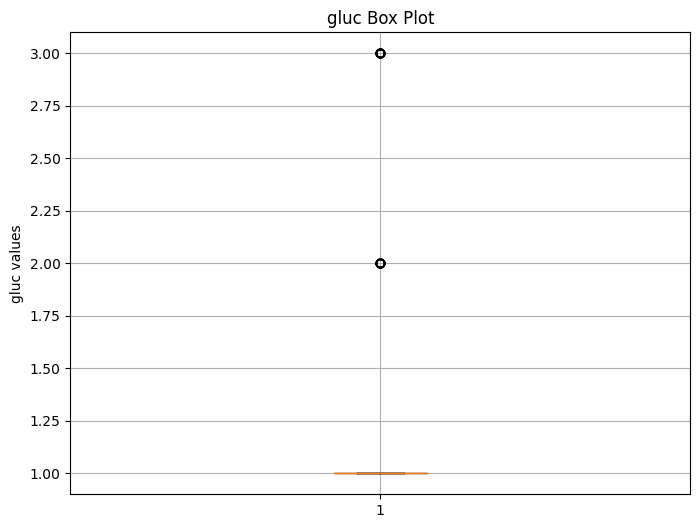

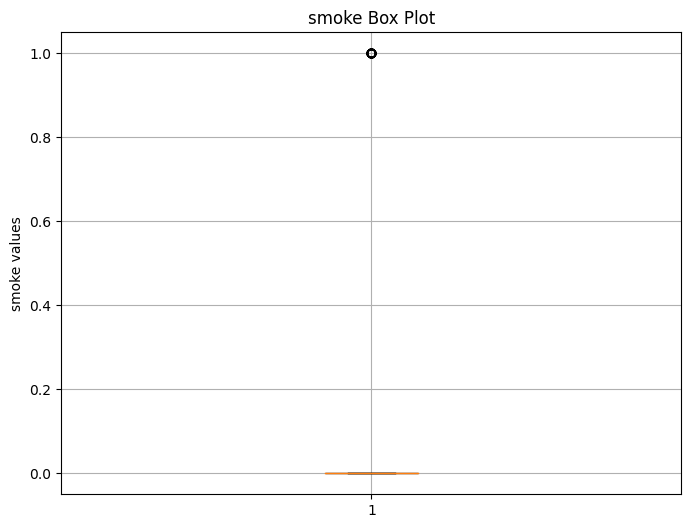

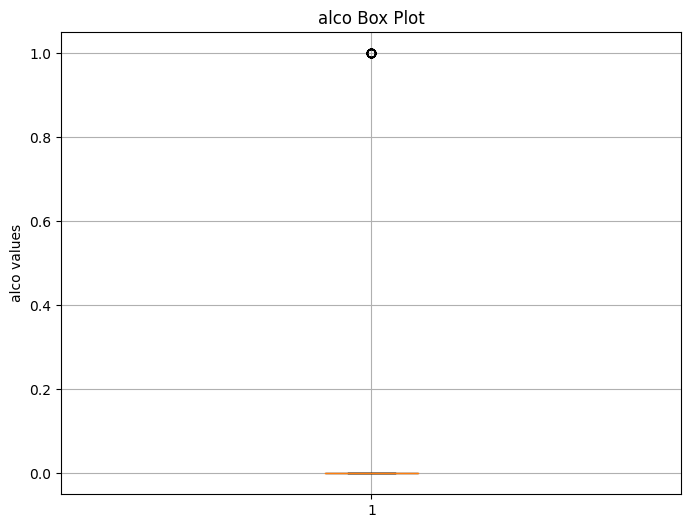

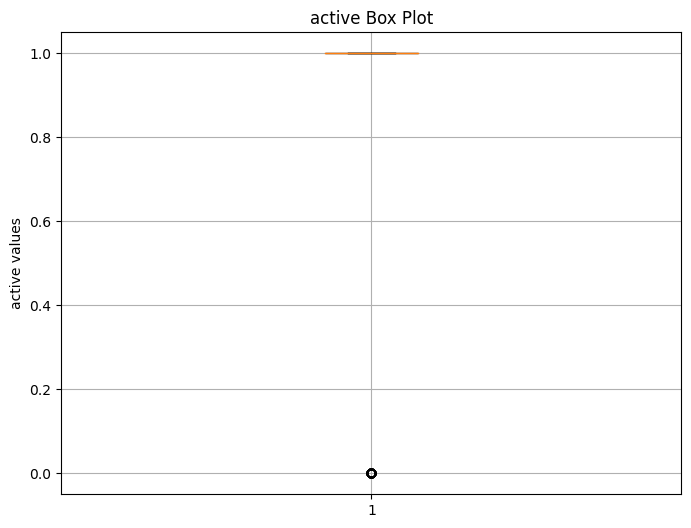

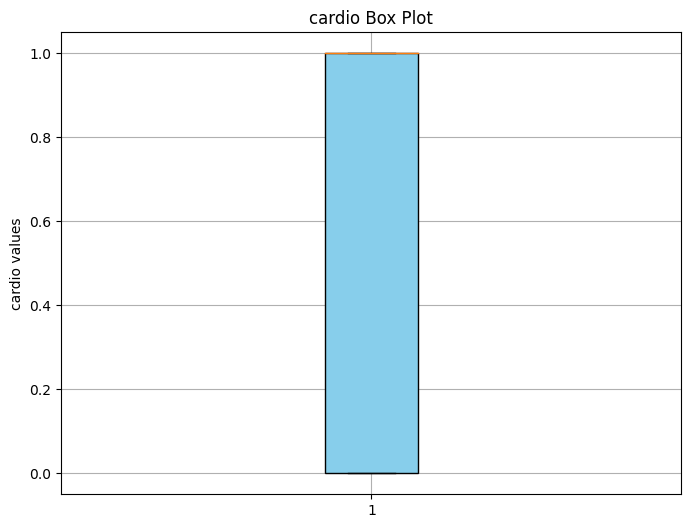

In [8]:
#Boxplot:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[column], vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'))
    plt.title(f'{column} Box Plot')
    plt.ylabel(f'{column} values')
    plt.grid(True)
    plt.show()


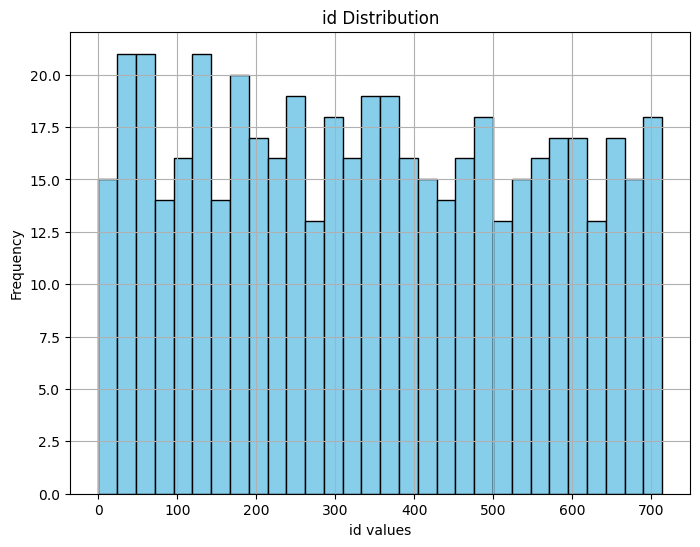

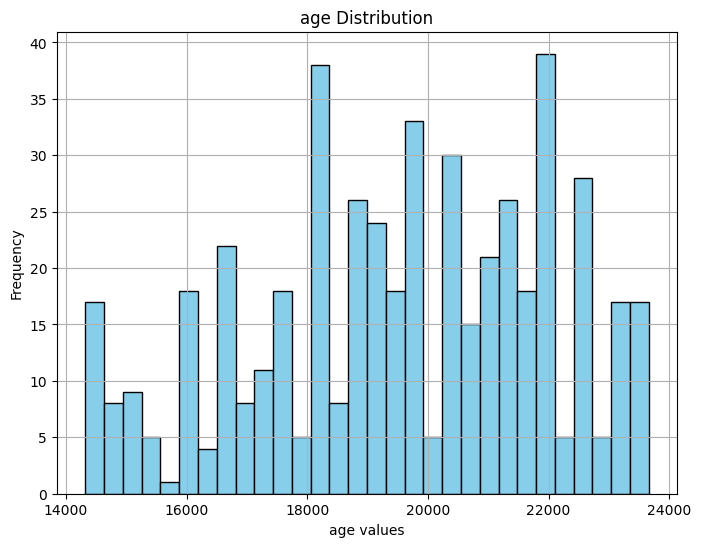

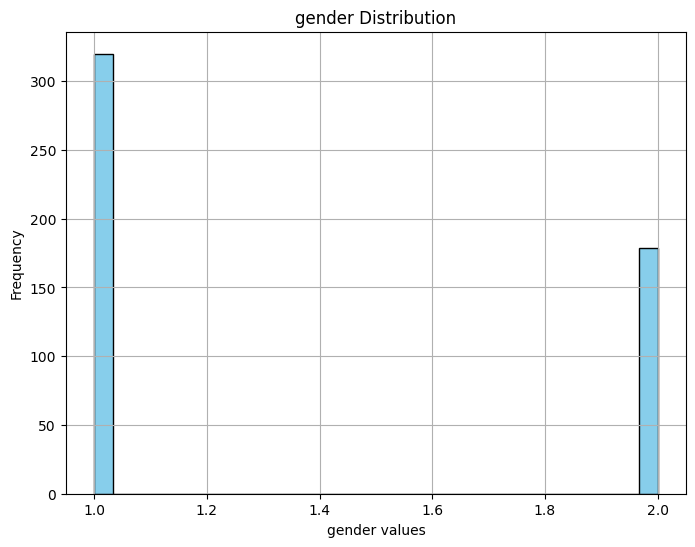

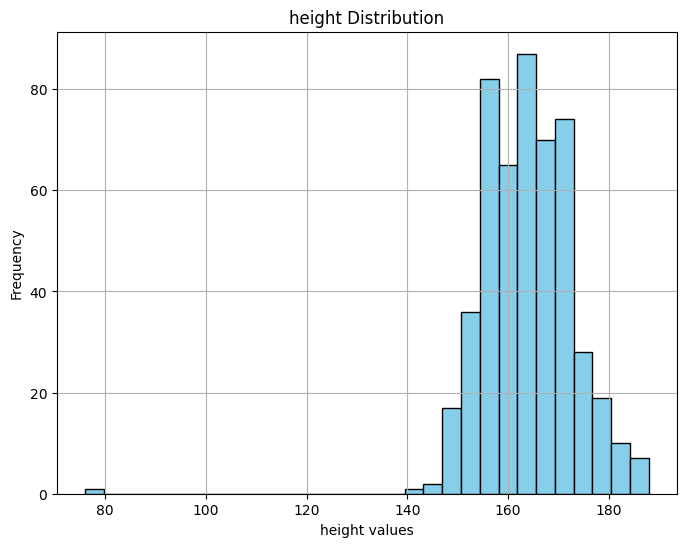

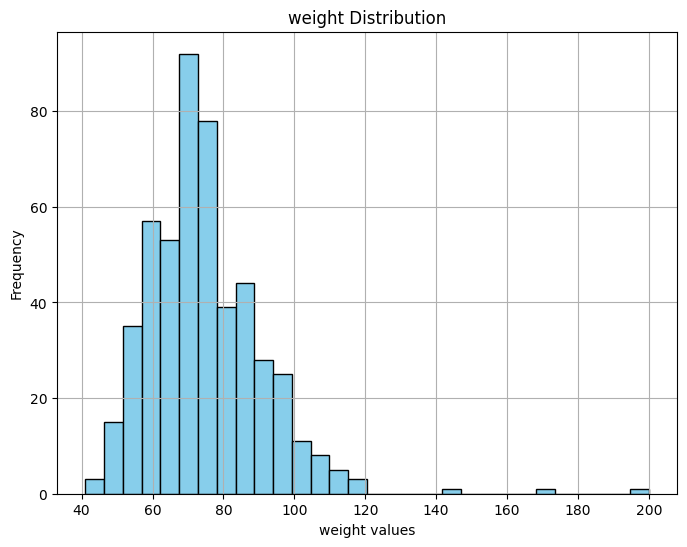

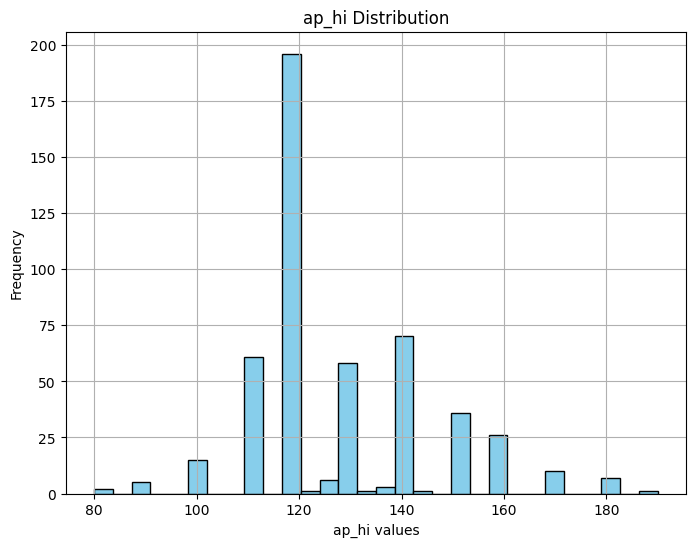

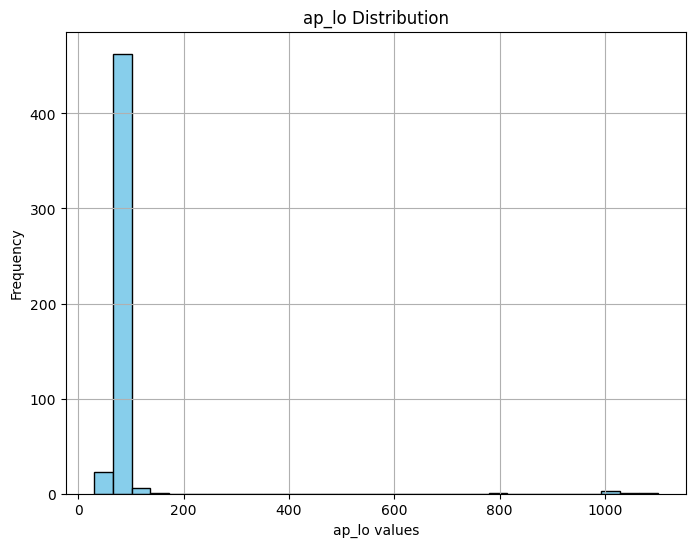

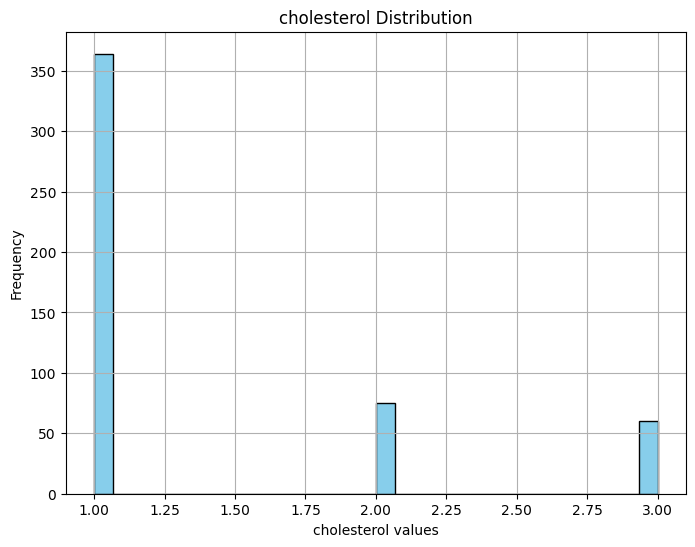

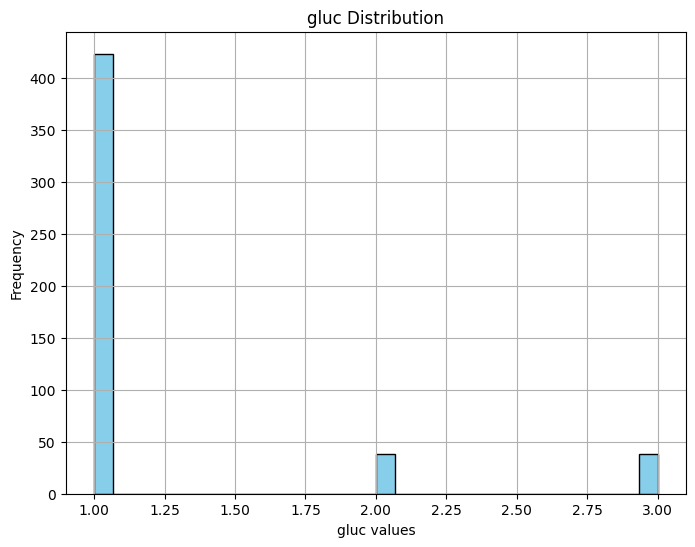

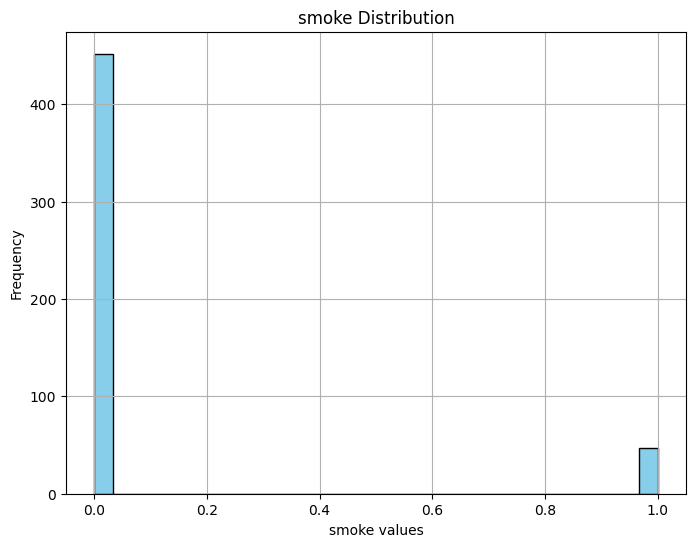

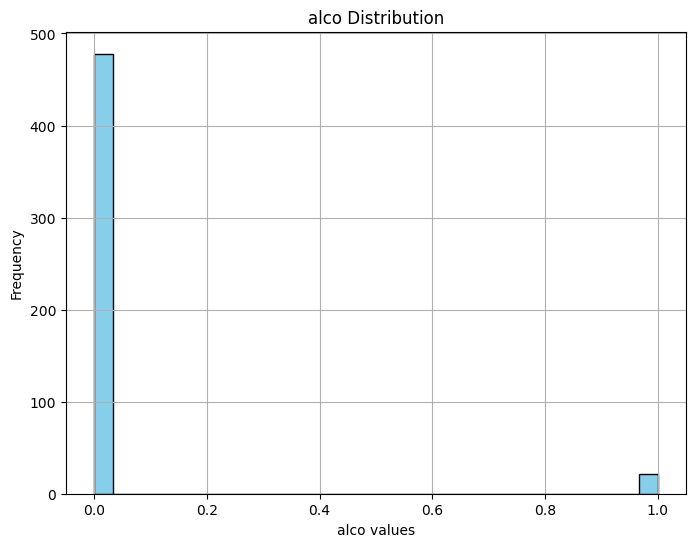

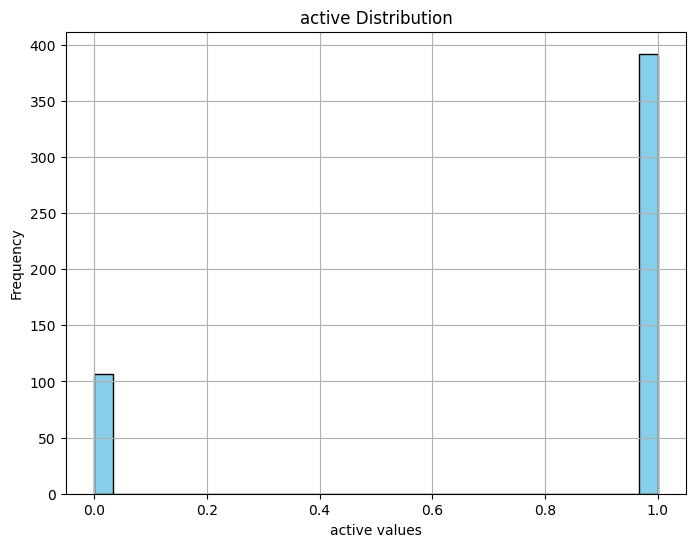

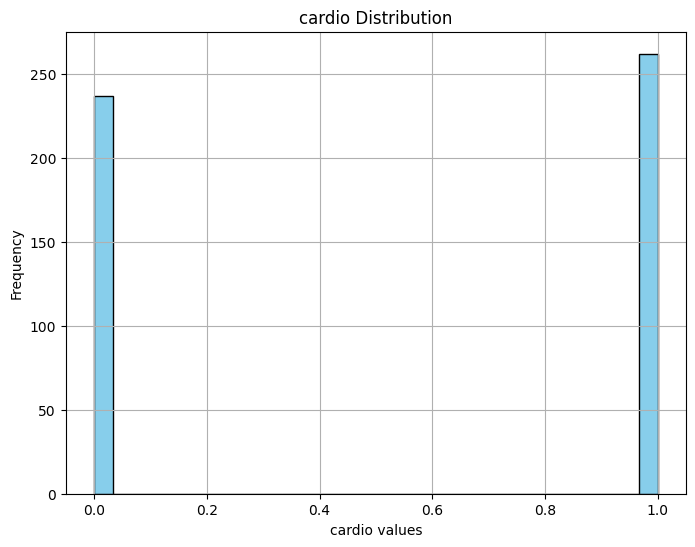

In [9]:
#Histogram:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{column} Distribution')
    plt.xlabel(f'{column} values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


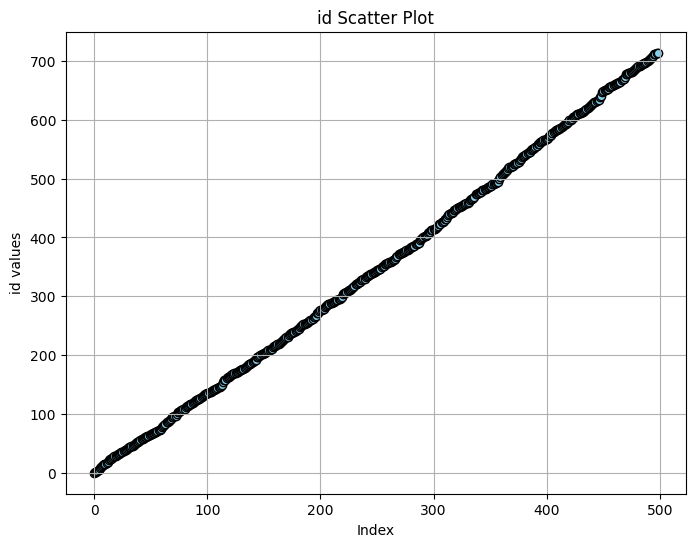

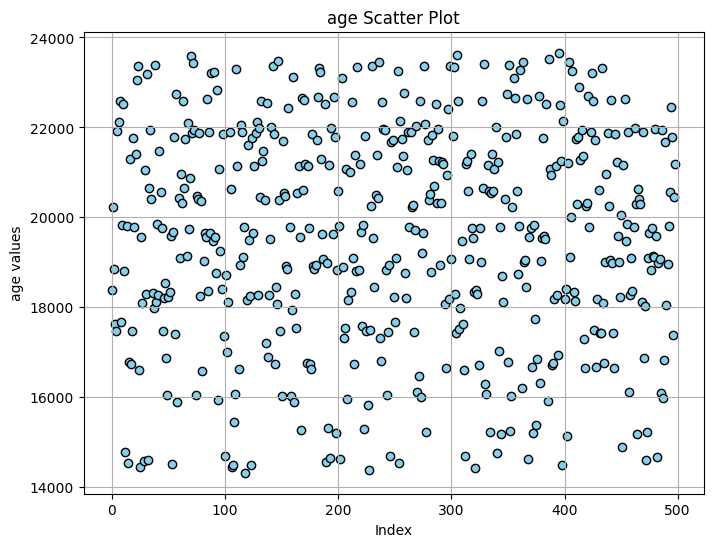

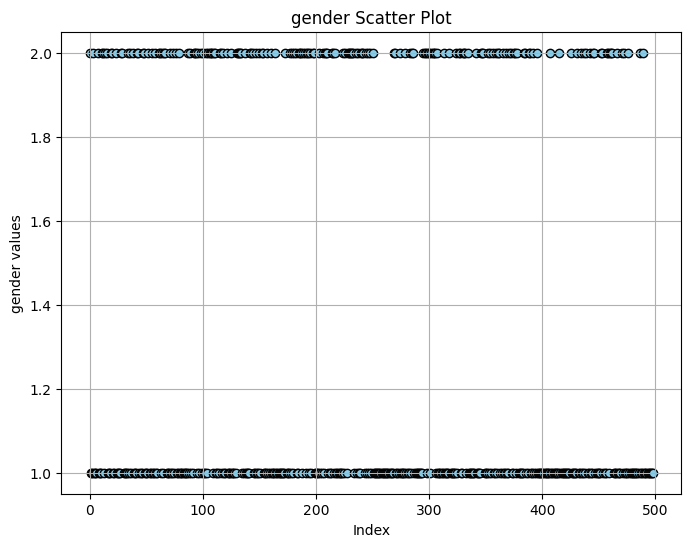

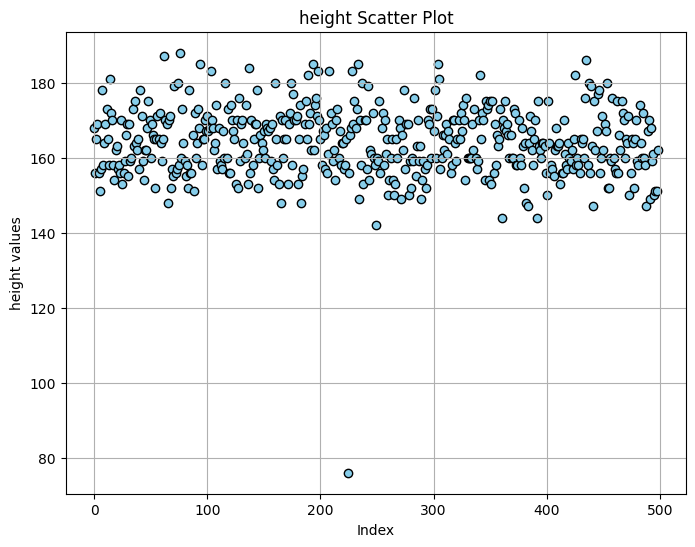

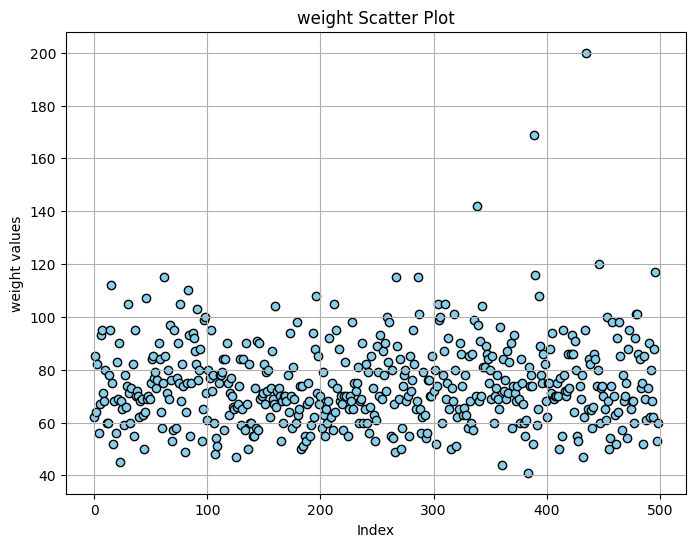

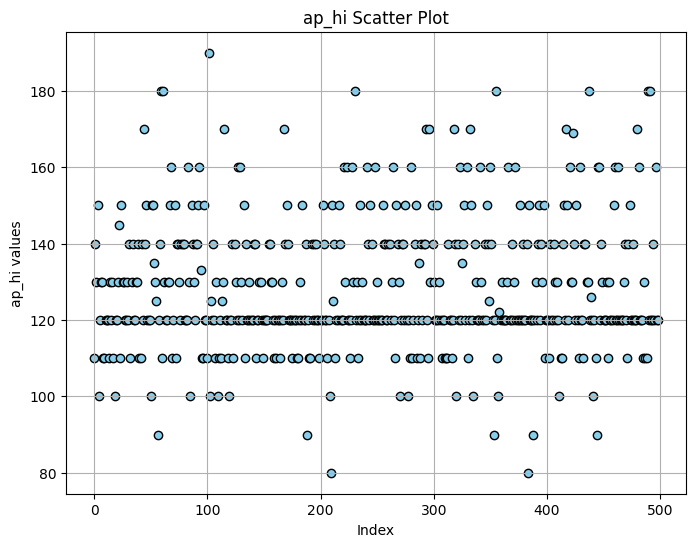

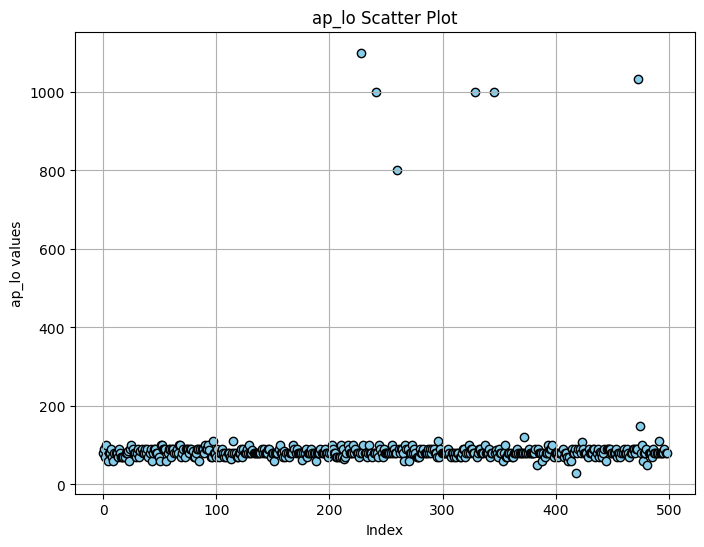

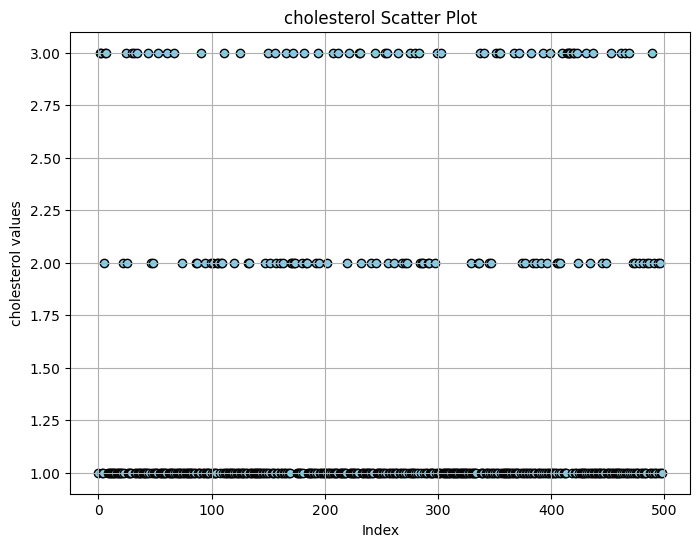

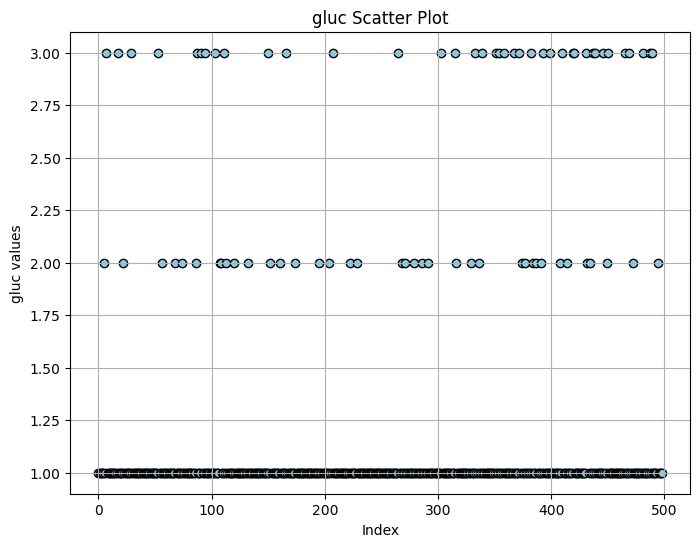

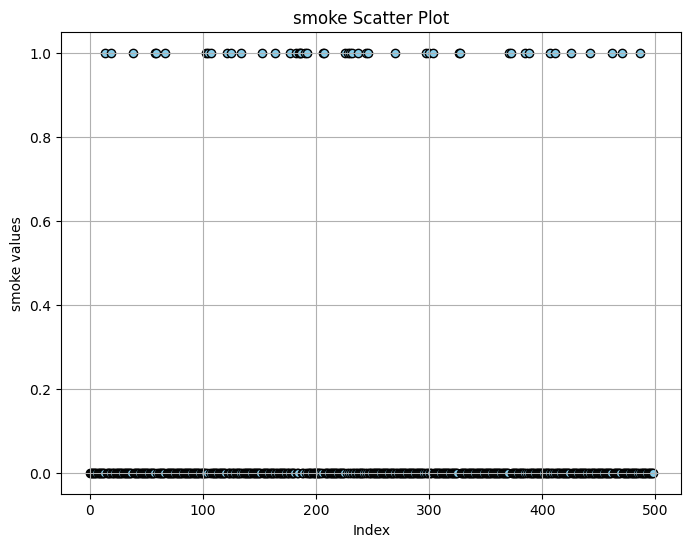

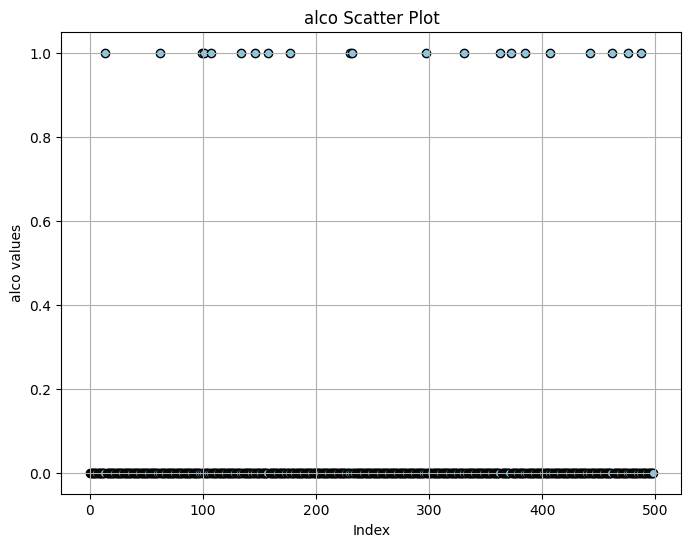

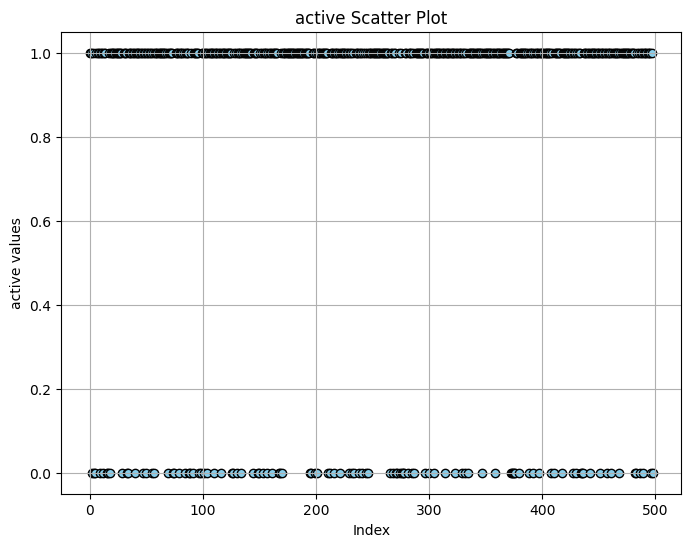

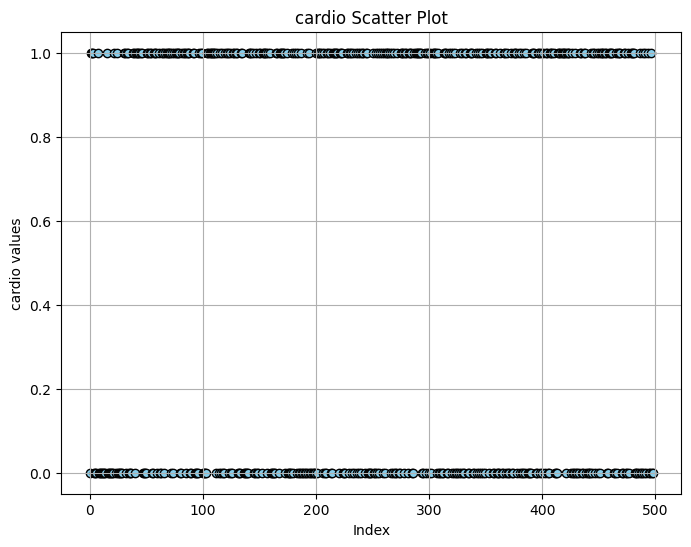

In [10]:
# Scatter plot:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(df[column])), df[column], color='skyblue', edgecolor='black')
    plt.title(f'{column} Scatter Plot')
    plt.xlabel('Index')
    plt.ylabel(f'{column} values')
    plt.grid(True)
    plt.show()

In [11]:
#Detect outliers:
z_scores = stats.zscore(df)
threshold = 3
outliers = (abs(z_scores) > threshold).any(axis=1)
outliers_df = df[outliers]
print("Rows with Outliers:")
print(outliers_df)

Rows with Outliers:
      id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
7     12  22584       2     178    95.0    130     90            3     3   
14    23  14532       2     181    95.0    130     90            1     1   
17    27  16747       1     158    52.0    110     70            1     3   
19    29  21755       2     162    56.0    120     70            1     1   
29    40  21057       2     169    74.0    130     70            1     3   
..   ...    ...     ...     ...     ...    ...    ...          ...   ...   
476  683  18825       2     164    68.0    140    100            1     1   
481  691  19589       1     158    86.0    160     50            2     3   
486  696  21939       2     160    85.0    130     90            2     1   
487  697  15975       1     158    69.0    110     80            1     3   
489  700  21681       2     167    73.0    180     80            3     3   

     smoke  alco  active  cardio  
7        0     0       1       1

In [12]:
 # Removing outliers
columns_to_check = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print(f"Original shape: {df.shape}")
print(f"Shape after removing outliers: {df.shape}")

Original shape: (499, 13)
Original shape: (498, 13)
Original shape: (489, 13)
Original shape: (479, 13)
Original shape: (447, 13)
Shape after removing outliers: (447, 13)


In [13]:
#Feature selection:

X = df.drop('cardio', axis=1)  # Features
y = df['cardio']  # Target variable
selector = VarianceThreshold(threshold=0.2)
X_new = selector.fit_transform(X)
selected_features = X.columns[selector.get_support()]
print("Original Dataset:")
print(X.head())
print("\nSelected Features after Variance Threshold:")
print(X[selected_features].head())


Original Dataset:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
5   8  21914       1     151    67.0    120     80            2     2      0   

   alco  active  
0     0       1  
1     0       1  
2     0       0  
3     0       1  
5     0       0  

Selected Features after Variance Threshold:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc
0   0  18393       2     168    62.0    110     80            1     1
1   1  20228       1     156    85.0    140     90            3     1
2   2  18857       1     165    64.0    130     70            3     1
3   3  17623       2     169    82.0    150    100            1     

In [14]:
# Function to convert age from days to years
def convert_days_to_years(age_in_days):
    return int(age_in_days / 365.25)

# Convert ages from days to years in the 'age' column
df['age'] = df['age'].apply(convert_days_to_years)

# Rename the 'age' column to 'age_in_years'
df = df.rename(columns={'age_in_years': 'age_in_years'})

# Print the first few rows of the dataframe with the converted ages
print(df.head())

   id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0   50       2     168    62.0    110     80            1     1      0   
1   1   55       1     156    85.0    140     90            3     1      0   
2   2   51       1     165    64.0    130     70            3     1      0   
3   3   48       2     169    82.0    150    100            1     1      0   
5   8   59       1     151    67.0    120     80            2     2      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
5     0       0       0  


In [15]:
# Define the bins
bins = [35, 45, 55, 65]

# Define the labels for the bins
labels = ['(35,45]', '(45,55]', '(55,65]']

# Discretize the age values into intervals
df['age_intervals'] = pd.cut(df['age'], bins=bins, labels=labels)

print(df)

      id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      0   50       2     168    62.0    110     80            1     1      0   
1      1   55       1     156    85.0    140     90            3     1      0   
2      2   51       1     165    64.0    130     70            3     1      0   
3      3   48       2     169    82.0    150    100            1     1      0   
5      8   59       1     151    67.0    120     80            2     2      0   
..   ...  ...     ...     ...     ...    ...    ...          ...   ...    ...   
493  706   56       1     159    68.0    120     80            1     1      0   
494  708   61       1     161    62.0    140     80            2     2      0   
495  711   59       1     150    88.0    120     80            1     1      0   
497  713   55       1     151    53.0    120     80            1     1      0   
498  714   58       1     162    60.0    120     80            1     1      0   

     alco  active  cardio a

In [16]:
#Normalization:
columns_to_normalize = ['age','height','weight','ap_hi','ap_lo','cholesterol','gluc']
data_to_normalize = df[columns_to_normalize]

minmax_scaler = MinMaxScaler()
normalized_data_minmax = minmax_scaler.fit_transform(data_to_normalize)

df[columns_to_normalize] = normalized_data_minmax

print("Min Max scaled data: ")
print(df)

Min Max scaled data: 
      id   age  gender    height    weight     ap_hi     ap_lo  cholesterol  \
0      0  0.44       2  0.565217  0.264706  0.142857  0.428571          0.0   
1      1  0.64       1  0.304348  0.602941  0.571429  0.714286          1.0   
2      2  0.48       1  0.500000  0.294118  0.428571  0.142857          1.0   
3      3  0.36       2  0.586957  0.558824  0.714286  1.000000          0.0   
5      8  0.80       1  0.195652  0.338235  0.285714  0.428571          0.5   
..   ...   ...     ...       ...       ...       ...       ...          ...   
493  706  0.68       1  0.369565  0.352941  0.285714  0.428571          0.0   
494  708  0.88       1  0.413043  0.264706  0.571429  0.428571          0.5   
495  711  0.80       1  0.173913  0.647059  0.285714  0.428571          0.0   
497  713  0.64       1  0.195652  0.132353  0.285714  0.428571          0.0   
498  714  0.76       1  0.434783  0.235294  0.285714  0.428571          0.0   

     gluc  smoke  alco  activ